<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" height="300" width="700"> 
</center>

# <center> R для тервера и матстата. <br>  <br>  Бутсрап </center>


---------------

Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2020). Автор ноутбука - [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://github.com/FUlyankin/r_probability) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

-----------

In [1]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов
library('rio')  

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

# 1. Что за Бутстрап


__Бутстрап__ - это метод оценки статистик сложных распределений. Часто возникает необходимость проверить гипотезу о какой-то очень неудобной статистике, распределение которой неизвестно или построить для неё доверительный интервал. 

Чтобы сделать это, надо придумать как распределение этой статистики получить. Мы с вами уже знаем два способа сделать это. 

Способ номер один называется параметрическим. Мы предполагаем, что генеральная совокупность имеет какое-то распределение. Мы можем даже проверить гипотезу об этом с помощью какого-нибудь критерия. После мы на основе этого распределения можем придумать адекватную случайную величину для проверки гипотезы. Именно так мы поступали раньше. Иногда такую случайную величину придумать сложно или вовсе невозможно. Например, поди придумай адекватный критерий для медианы или моды. К тому же не очень понятно из каких соображений выбирать семейство распределений для проверки гипотезы, так как про данные ничего неизвестно. Другим способом был тест отношения правдоподобий. Пришло время познакомиться с третьим методом.

Он говорит следующее: давайте извлечём из генеральной совокупности какое-то количество выборок, посчитаем по ним нашу статистику, для которой доверительный интервалы мы хотим получить, а потом оценим эмпирически её выборочное распределение и на его основе получим доверительные интервалы. Этот способ применим скорее в теории, чем на практике. Если мы можем генерировать бесконечное число выборок из генеральной совокупности, то для нас незатруднительно посчитать истинное значение интересующих нас параметров.  

Эти мысли подводят нас к идее бутстрапа. В нашем распоряжении есть выборка. Давайте сделаем вид, что она и есть генеральная совокупность и будем извлекать из неё с повторением элементы. На основе получившихся подвыборок мы можем оценить всё, что нашей душе угодно. Поначалу такое кажется безумием, но это реально работает. И есть даже несколько теорем, которые доказывают почему это работает и как нужно правильно делать это в сложных ситуациях. 

Опишем бутстрап чуть более формально. Пусть имеется выборка $X$ размера $N$. Равномерно возьмём из выборки $N$ объектов с возвращением. Это означает, что мы будем $N$ раз выбирать произвольный объект выборки (считаем, что каждый объект достаётся с одинаковой вероятность $\frac{1}{N}$), причём каждый раз мы выбираем из всех исходных $N$ объектов. Можно представить себе мешок, из которого достают шарики: выбранный на каком-то шаге шарик возвращается обратно в мешок, и следующий выбор опять делается равновероятно из того же числа шариков. Конечно же из-за возвращения среди них окажутся повторы. 

Обозначим новую выборку через $X_1$. Повторяя процедуру $B$ раз, сгенерируем $B$ подвыборок $X_1, \ldots, X_B$. Теперь мы имеем достаточно большое число выборок и можем оценивать различные статистики исходного распределения.

![](https://hsto.org/getpro/habr/post_images/198/14a/3f7/19814a3f7efaa3b7d1a3f8ab35889832.jpg)



![](https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_7/7.1%20presa_AB/bootstrap.png)

По изначальной выборке мы могли посчитать всего одну статистику. По сгенерированным подвыборкам мы можем посчитать $B$ статистик и увидеть как наша неизвестная статистика распределена. Скорее всего, вам кажется это сложным. Давайте попробуем посмотреть на конкретный пример. Возможно, станет легче. Но это неточно. 

----- 

### Упражнение 1

У Маши есть выборка $1,2,3,4$! Постройте по ней бутсрап-распеределение для статистики $\bar x$! 


### Упражнение 2

У Винни-Пуха есть $100$ песенок (кричалок, вопелок, пыхтелок и сопелок). Каждый день он выбирает и поёт одну из них равновероятно наугад. Одну и ту же песенку он может петь несколько раз. Сколько в среднем песенок оказываются неспетыми за $100$ дней?

----------------

### Упражнение 3

Verizon — основная региональная телекоммуникационная компания (Incumbent Local Exchange Carrier, ILEC) в западной 
части США. В связи с этим данная компания обязана предоставлять сервис ремонта телекоммуникационного оборудования 
не только для своих клиентов, но и для клиентов других локальных телекоммуникационых компаний (Competing Local Exchange Carriers, CLEC). При этом в случаях, когда время ремонта оборудования для клиентов других компаний существенно выше, чем для собственных, Verizon может быть оштрафована. 

Проверим правда ли время на ремонт своего оборудования существенно ниже чем время на ремонт других компаний.

In [3]:
library('dplyr')
library('rio') # тут import, который сам догадается до разделителей и даже excel прочтёт

df = import('verizon.csv')

# ILEC - внутренний клиент 
# CLEC - внешние клиенты 
head(df)

Time,Group
17.50,ILEC
2.40,ILEC
0.00,ILEC
0.65,ILEC
22.23,ILEC
1.20,ILEC


В выборке имеется сильный перекос в наблюдениях. 

In [4]:
df %>% group_by(Group) %>% summarise(count = n(), mean = mean(Time), median = median(Time))

Group,count,mean,median
CLEC,23,16.509130,14.33
ILEC,1664,8.411611,3.59


В выборке есть выбросы. 

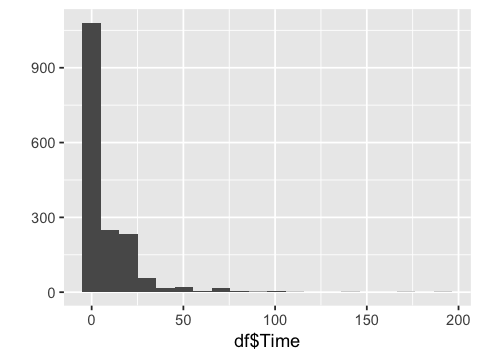

In [6]:
qplot(df$Time, bins=20)

Из-за этого средние будут не очень адекватной оценкой для типичного представителя выборки. Используя их, мы будем искуственно находиться на стороне компании. Поэтому гораздо уместнее сформулировать в терминах медиан, так как они нечувствительны к выбросам в отличие от средних. 

$$
\begin{aligned}
&H_0: \hspace{2mm} med_1 = med_2 \\
&H_1: \hspace{2mm} med_1 > med_2
\end{aligned}
$$

Беда в том, что для медиан как раз у нас нет хорошей статистики. Это весомый повод прибегнуть к бустрапу!

In [7]:
df %>% sample_n(size = 3, replace=TRUE)

Time,Group
23.60,ILEC
4.03,ILEC
16.87,ILEC


Сделали подвыборку размера $3$ с повторениями, потом по ней можно что-нибудь посчитать. Например, медианы. Закодим бустрап в виде двух функций. Первая будет делать `B_sample` выборок.

In [8]:
get_bootstrap_samples <- function(data, B_sample){
    samples = list() # лист, куда мы будем записывать выборки
    
    for(i in 1:B_sample){
        # генерируем выборки с повторениями соответствующую по размерам оригинальной  
        # и записываем её в лист
        samples[[i]] = sample(data, size = length(data), replace=TRUE)
        }
    return(samples)
    }

In [ ]:
# неколько сбустрапированных выборк
# get_bootstrap_samples(df$Time, 3)

Вторая функция будет искать квантили сгерированого распределения. 

In [9]:
stat_intervals <- function(stat, alpha){
    return(quantile(stat, c(alpha/2,(1-alpha/2)), name = FALSE))
    }

Отделим данные по внутренним и внешним клиентам друг от друга и построим доверительные интервалы для каждой из медиан. Будем бустрапировать $1000$ выборок. 

In [10]:
ilec = df %>% filter(Group == 'ILEC')
clec = df %>% filter(Group == 'CLEC')

# Делаем 1000 выборок для первой таблички и считаем по каждой медиану 
# функция lapply применяет функцию median к каждой выборке 
# команда as.numeric сделает листы векторами

clec_median_scores = as.numeric(lapply(get_bootstrap_samples(clec$Time, 10000), median))
ilec_median_scores = as.numeric(lapply(get_bootstrap_samples(ilec$Time, 10000), median))

Смотрим на итоговые доверительный интервалы. 

In [11]:
cat("95% confidence interval for the ILEC median repair time:", stat_intervals(ilec_median_scores, 0.05),'\n')
cat("95% confidence interval for the CLEC median repair time:", stat_intervals(clec_median_scores, 0.05))

95% confidence interval for the ILEC median repair time: 3.22 3.835 
95% confidence interval for the CLEC median repair time: 5.8 20

По аналогии найдём доверительный интервал для разности медиан. 

In [12]:
delta_median_scores = clec_median_scores - ilec_median_scores
cat("95% confidence interval for the diff median repair time:", stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the diff median repair time: 2.04 16.63

Оценим вероятность того, что разность больше нуля. 

In [13]:
sum(delta_median_scores > 0)/length(delta_median_scores)

[1] 0.9983

Кажется, компанию пришло время оштрафовать. Ещё один пример на бустрап мы посмотрим в тетрадке с поющими котами.

## Почиташки:

* [Статья про бустрэп от Анатольева,](http://quantile.ru/03/03-SA.pdf) она немного брутальная из-за регрессий и тп. Саму статью вы не поймёте, но в конце неё есть ссылки на то, что можно почитать на более простом уровне и углубиться в тему. 
* [Годная статейка про бутстрап в R](https://moderndive.com/8-confidence-intervals.html) да и вообще книжка про статистику в R неплохая
* [Ещё немного брутального бутстрэпа](https://yadi.sk/i/uc0ZbMuR27bvmQ) 